# Importing libraries

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cv2
import torch
from torchvision import transforms
from mtcnn import MTCNN
import os

import pandas as pd

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Read raw data

In [7]:
# Raw data path
raw_data_path = './data/images/'

In [8]:
# Raw images
raw_images = glob(raw_data_path + '*')

In [9]:
from dataset import show_image

In [10]:
# Number to show
n_to_show = 10

In [11]:
# Mappings from integers to labels
gender_mapping = {1: 'Female', 0: 'Male'}
race_mapping = {0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Others'}

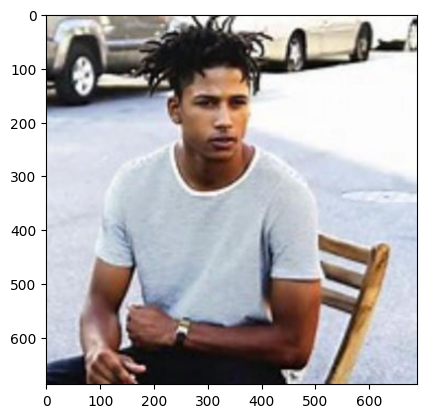

--------------------------------------------------
Age = 23, Gender = Male, Race = Black
--------------------------------------------------


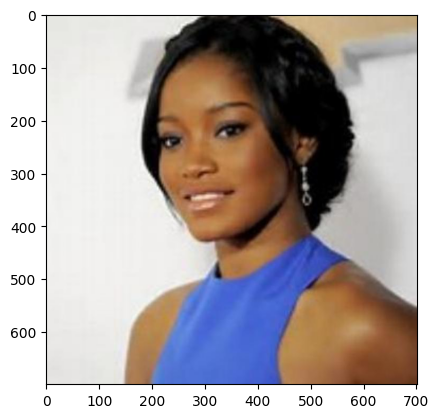

--------------------------------------------------
Age = 23, Gender = Female, Race = Black
--------------------------------------------------


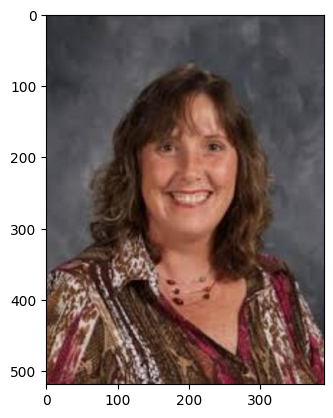

--------------------------------------------------
Age = 33, Gender = Female, Race = White
--------------------------------------------------


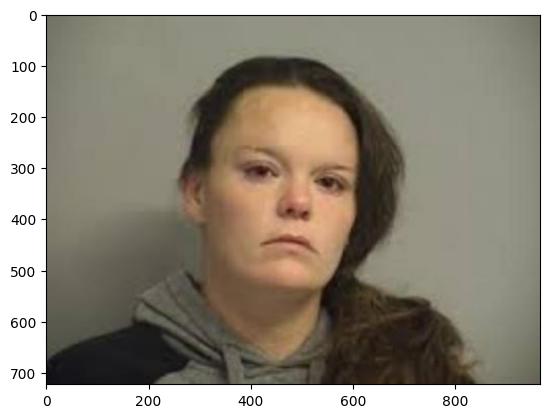

--------------------------------------------------
Age = 33, Gender = Female, Race = White
--------------------------------------------------


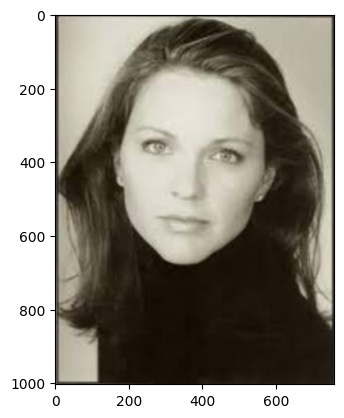

--------------------------------------------------
Age = 29, Gender = Female, Race = White
--------------------------------------------------


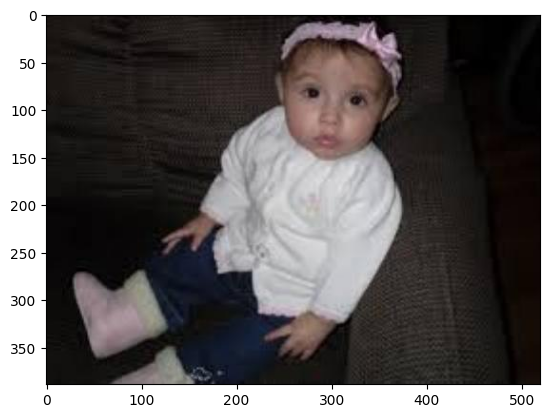

--------------------------------------------------
Age = 2, Gender = Female, Race = Others
--------------------------------------------------


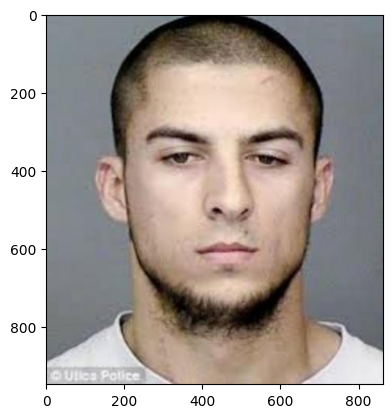

--------------------------------------------------
Age = 28, Gender = Male, Race = White
--------------------------------------------------


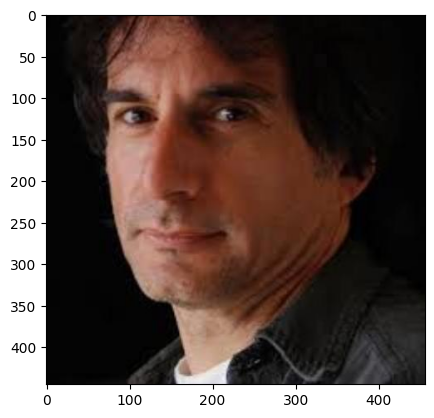

--------------------------------------------------
Age = 42, Gender = Male, Race = White
--------------------------------------------------


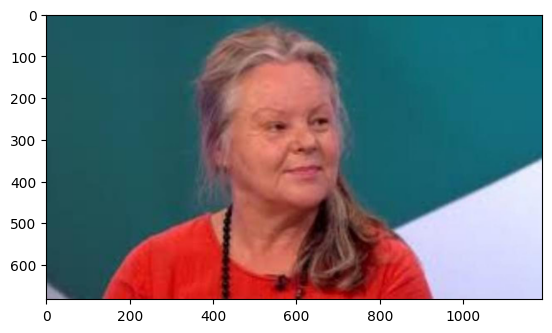

--------------------------------------------------
Age = 58, Gender = Female, Race = White
--------------------------------------------------


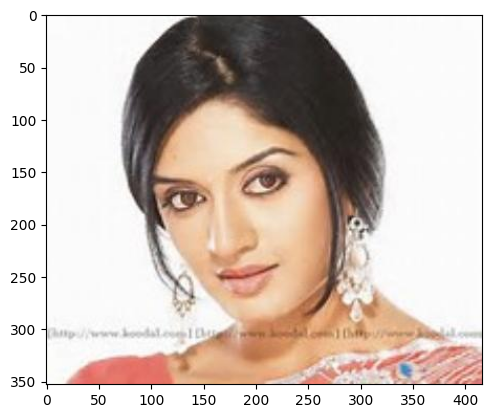

--------------------------------------------------
Age = 25, Gender = Female, Race = Indian
--------------------------------------------------


In [12]:
# Plot random 10 images from the raw images with their labels
for index in np.random.choice(np.arange(len(raw_images)), 10):
    image_path = raw_images[index]
    annotation = image_path.split('\\')[-1]
    info = annotation.split('_')
    show_image(image_path) 
    print('-'*50)
    print(f'Age = {info[0]}, Gender = {gender_mapping[int(info[1])]}, Race = {race_mapping[int(info[2])]}')
    print('-'*50)

# The distribution of labels

In [13]:
from dataset import extract_labels

In [14]:
# Extract the raw labels
raw_labels = extract_labels(raw_images)

In [15]:
import seaborn as sns

In [16]:
def labeled_countplot(data, column, ticks = dict()):
    ax = sns.countplot(x=column, data=data)
    n = data[column].nunique()
    plt.title(f'Countplot for column - {column}', size=17)
    plt.xlabel(column, size=15)
    plt.ylabel('Count', size=15)
    x_index = list(range(n))
    x_ticks = [ticks[index] for index in x_index]
    plt.xticks(x_index, labels = x_ticks, size=14)
    max_height = 0
    for p in ax.patches:
        max_height = max(max_height, p.get_height())
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.ylim(0, max_height*1.1)
    plt.show()

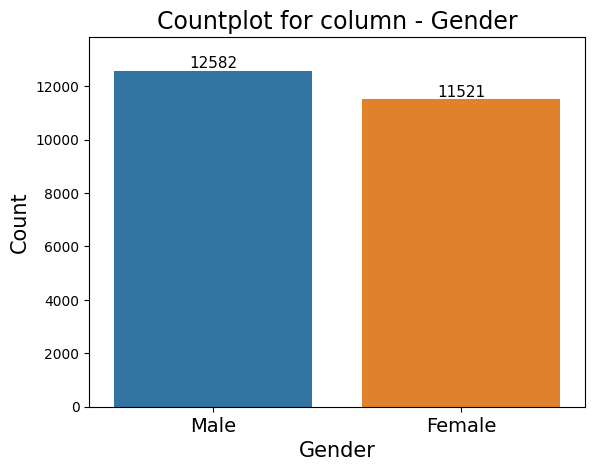

In [17]:
labeled_countplot(raw_labels, 'Gender', ticks = gender_mapping)

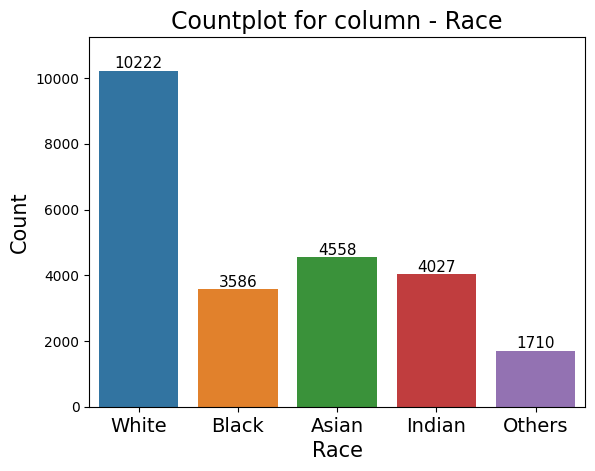

In [18]:
labeled_countplot(raw_labels, 'Race', ticks = race_mapping)

In [19]:
raw_labels.Age = raw_labels.Age.astype(np.uint8)

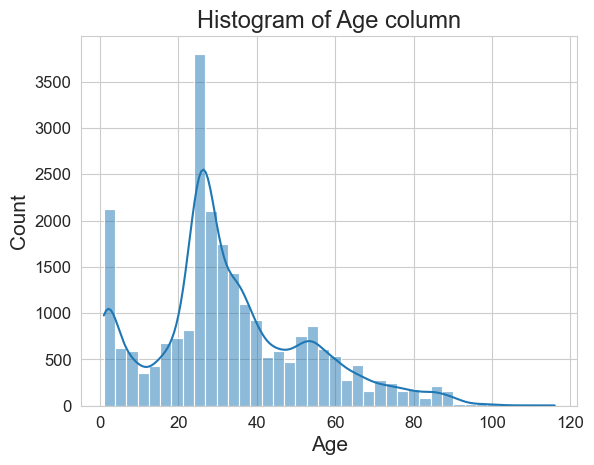

In [20]:
sns.set_style('whitegrid')
plt.title('Histogram of Age column', size=17)
plt.xlabel('Age', size=15)
plt.ylabel('Count', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
sns.histplot(data=raw_labels, x='Age', kde=True, bins=40)
plt.show()

# Crop faces from raw data

In [21]:
face_detector = MTCNN()

In [22]:
from dataset import crop_face, crop_faces

In [1]:
# crop_faces(raw_images, face_detector, save=True)

# Read face data

In [27]:
face_data_path = './data/face_cropped/images/'

In [28]:
# Get all face images
face_images = glob(face_data_path + '*')

In [30]:
from dataset import resize_image, good_res_quality, resize_filter_images

In [33]:
# Resize and filter all face images, save in the directory
resize_filter_images(face_images, threshold=18000, save=True, dir_to_save='./data/resized_cropped_images/')

0 - Done!
100 - Done!
200 - Done!
400 - Done!
600 - Done!
700 - Done!
800 - Done!
1000 - Done!
1200 - Done!
1300 - Done!
1400 - Done!
1600 - Done!
2100 - Done!
2300 - Done!
2700 - Done!
2900 - Done!
3000 - Done!
3100 - Done!
3200 - Done!
3300 - Done!
3400 - Done!
3500 - Done!
3600 - Done!
3700 - Done!
3800 - Done!
3900 - Done!
4000 - Done!
4100 - Done!
4200 - Done!
4400 - Done!
4600 - Done!
4700 - Done!
4900 - Done!
5000 - Done!
5100 - Done!
5200 - Done!
5300 - Done!
5400 - Done!
5500 - Done!
5600 - Done!
5700 - Done!
5800 - Done!
5900 - Done!
6000 - Done!
6100 - Done!
6300 - Done!
6400 - Done!
6500 - Done!
6700 - Done!
6800 - Done!
6900 - Done!
7000 - Done!
7100 - Done!
7400 - Done!
7500 - Done!
7700 - Done!
7900 - Done!
8000 - Done!
8100 - Done!
8200 - Done!
8300 - Done!
8400 - Done!
8500 - Done!
8600 - Done!
8700 - Done!
8800 - Done!
9000 - Done!
9100 - Done!
9200 - Done!
9400 - Done!
9500 - Done!
10100 - Done!
10200 - Done!
10300 - Done!
10400 - Done!
10500 - Done!
10600 - Done!
11

# Save resized cropped faces' data in numpy

In [34]:
resized_data_path = './data/resized_cropped/'

In [35]:
resized_image_path = './data/resized_cropped_images/'

In [36]:
# Get all resized data
resized_data = glob(resized_image_path + '*')

In [37]:
# Extract all labels from the resized data
labels_data = extract_labels(resized_data)

In [38]:
labels_data.shape

(17441, 3)

In [39]:
from dataset import save_in_np

In [41]:
# Save resized data in numpy files
save_in_np(resized_data, path_to_save = './data/resized_cropped/')

In [42]:
# Save labels in csv file
labels_data.to_csv(resized_data_path + 'labels.csv', index=False)

# Train Test Split

In [43]:
# Read all np files
np_files = glob('./data/resized_cropped/*.npy')

In [44]:
# Append in a list
cont = []
for np_f in np_files:
    read = np.load(np_f)
    cont.append(read)

In [46]:
# Concatenate into one numpy array
X_data = np.concatenate(cont, axis=0)

In [45]:
# Read label data
labels_data = pd.read_csv(resized_data_path + 'labels.csv')

In [48]:
from dataset import train_val_test_split

In [49]:
# Split the data
train_indices, val_indices, test_indices = train_val_test_split(len(labels_data), val_size=0.1, test_size=0.2)

In [50]:
# Make images uint8
X_train = X_data[train_indices].astype(np.uint8)
X_val = X_data[val_indices].astype(np.uint8)
X_test = X_data[test_indices].astype(np.uint8)

In [51]:
# Make the dataframe numpy array 
y_data = labels_data.to_numpy()

In [52]:
# Make labels uint8
y_train = y_data[train_indices].astype(np.uint8)
y_val = y_data[val_indices].astype(np.uint8)
y_test = y_data[test_indices].astype(np.uint8)

In [53]:
# Save train
np.save('./data/train_data/Xtrain.npy', X_train)
np.save('./data/train_data/ytrain.npy', y_train)

In [54]:
# Save test
np.save('./data/test_data/Xtest.npy', X_test)
np.save('./data/test_data/ytest.npy', y_test)

In [55]:
# Save val
np.save('./data/val_data/Xval.npy', X_val)
np.save('./data/val_data/yval.npy', y_val)